## Example for Boruta Selection.

In [1]:
library(Boruta)
library(ranger)

Warning message:
"package 'Boruta' was built under R version 4.0.4"
Warning message:
"package 'ranger' was built under R version 4.0.4"


In [2]:
mydata <- read.csv("./example.csv",header=T)
mydata <- mydata[complete.cases(mydata),]
predictors <- data.frame(mydata[1:83])
decision <- data.frame(mydata[,84])

In [3]:
mydata <- data.frame(predictors[1:83], decision = factor(decision[, 1]))

 1. run of importance source...

 2. run of importance source...

 3. run of importance source...

 4. run of importance source...

 5. run of importance source...

 6. run of importance source...

 7. run of importance source...

 8. run of importance source...

 9. run of importance source...

 10. run of importance source...

 11. run of importance source...

 12. run of importance source...

 13. run of importance source...

 14. run of importance source...

After 14 iterations, +0.85 secs: 

 confirmed 10 attributes: log.sigma.3.0.mm.3D_firstorder_Median, log.sigma.5.0.mm.3D_glcm_Idm, original_firstorder_Median, original_firstorder_Skewness, original_gldm_LargeDependenceLowGrayLevelEmphasis and 5 more;

 rejected 26 attributes: log.sigma.1.0.mm.3D_firstorder_Minimum, log.sigma.1.0.mm.3D_firstorder_Skewness, log.sigma.1.0.mm.3D_ngtdm_Strength, log.sigma.2.0.mm.3D_glrlm_GrayLevelNonUniformityNormalized, log.sigma.2.0.mm.3D_glrlm_RunVariance and 21 more;

 still have 47 attributes le

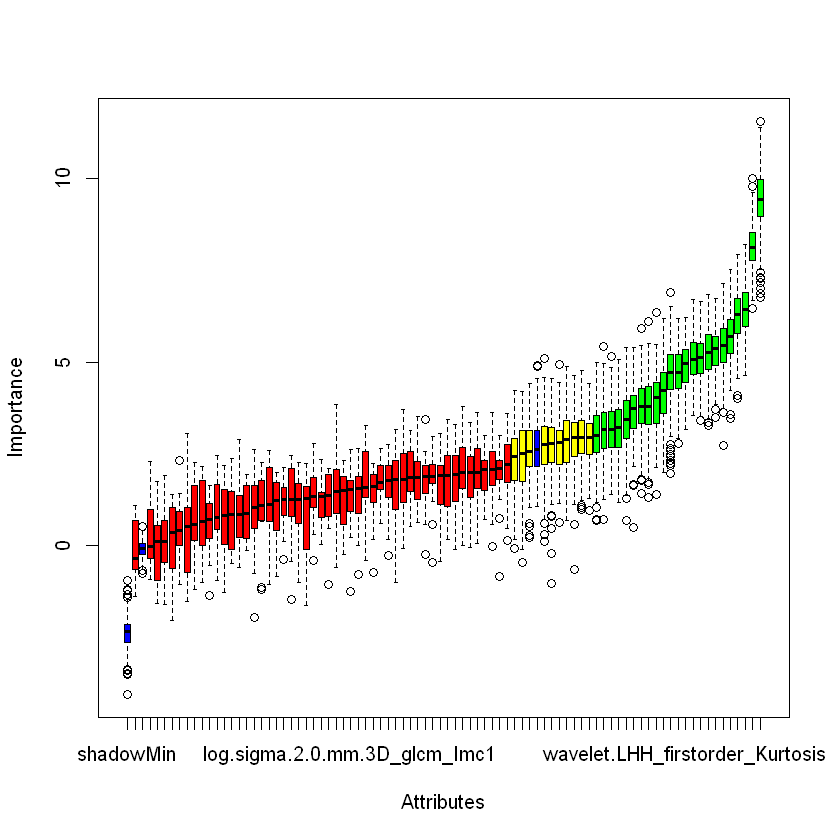

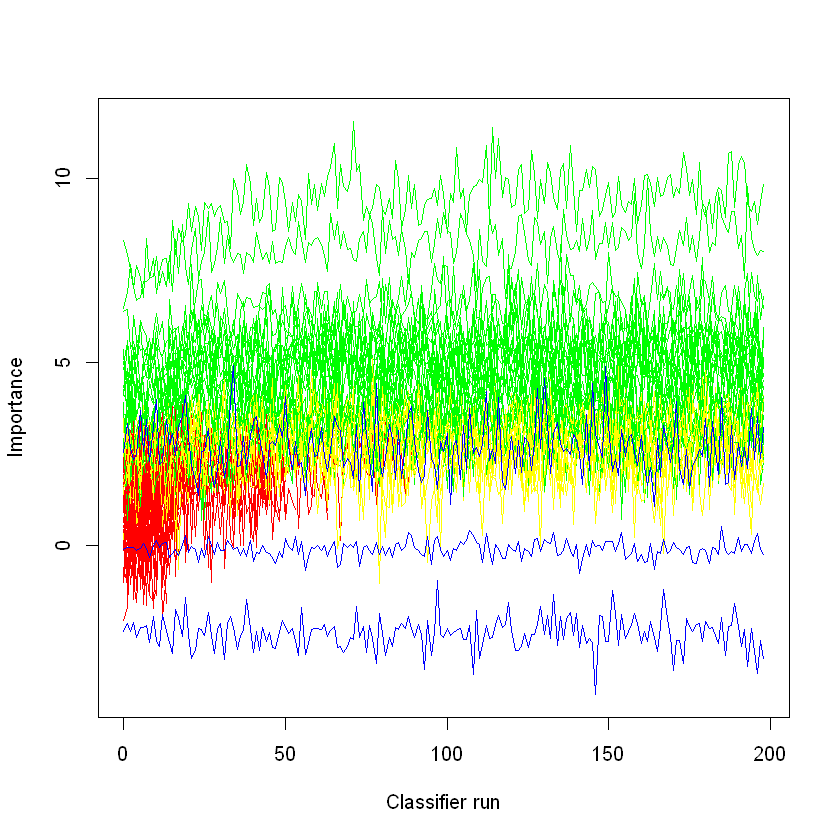

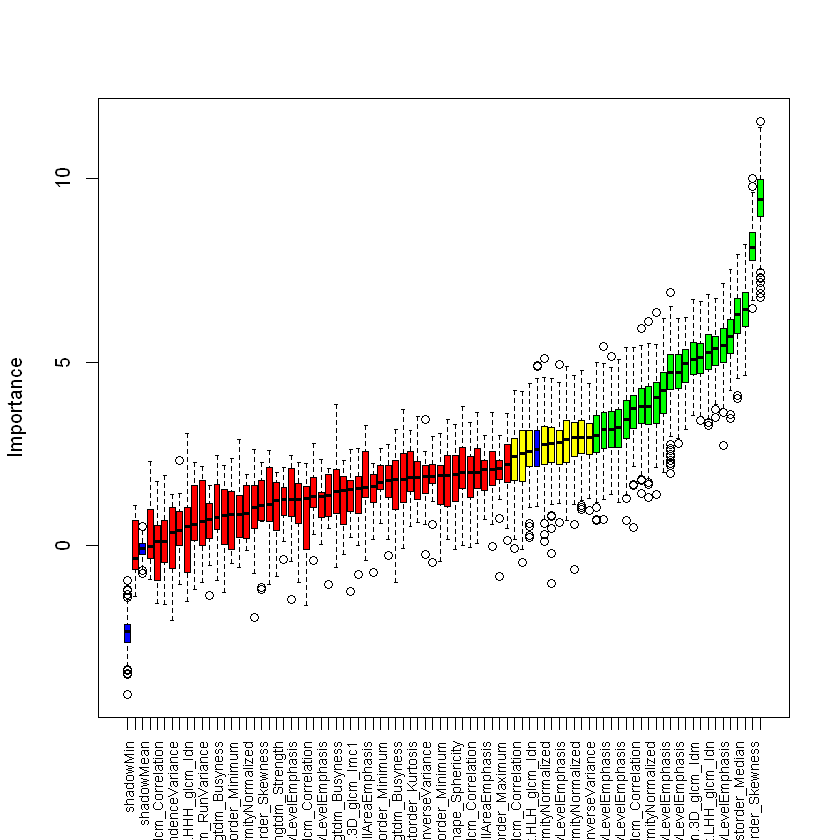

In [4]:
set.seed(1)
Boruta.mydata <- Boruta(decision ~., data = mydata,doTrace = 2, maxRuns=200, ntree = 500)
plot(Boruta.mydata)
plotImpHistory(Boruta.mydata)
plot(Boruta.mydata, xlab = "", xaxt = "n")
lz<-lapply(1:ncol(Boruta.mydata$ImpHistory),function(i)
  Boruta.mydata$ImpHistory[is.finite(Boruta.mydata$ImpHistory[,i]),i])
names(lz) <- colnames(Boruta.mydata$ImpHistory)  
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels), 
     at = 1:ncol(Boruta.mydata$ImpHistory), cex.axis = 0.7)

In [5]:
final.boruta <- TentativeRoughFix(Boruta.mydata)
print(final.boruta)
getSelectedAttributes(final.boruta, withTentative = F)
boruta.df <-  attStats(final.boruta)
boruta.df

Boruta performed 199 iterations in 7.848005 secs.
Tentatives roughfixed over the last 199 iterations.
 30 attributes confirmed important:
log.sigma.1.0.mm.3D_glcm_Correlation,
log.sigma.1.0.mm.3D_glszm_GrayLevelNonUniformityNormalized,
log.sigma.1.0.mm.3D_glszm_SmallAreaLowGrayLevelEmphasis,
log.sigma.2.0.mm.3D_glszm_SmallAreaLowGrayLevelEmphasis,
log.sigma.3.0.mm.3D_firstorder_90Percentile and 25 more;
 53 attributes confirmed unimportant:
log.sigma.1.0.mm.3D_firstorder_Minimum,
log.sigma.1.0.mm.3D_firstorder_Skewness,
log.sigma.1.0.mm.3D_glrlm_GrayLevelNonUniformityNormalized,
log.sigma.1.0.mm.3D_ngtdm_Busyness, log.sigma.1.0.mm.3D_ngtdm_Strength
and 48 more;


[1] "wavelet.HLL_gldm_LargeDependenceHighGrayLevelEmphasis"     
 [2] "log.sigma.1.0.mm.3D_glszm_SmallAreaLowGrayLevelEmphasis"   
 [3] "log.sigma.5.0.mm.3D_glcm_Idm"                              
 [4] "original_firstorder_Median"                                
 [5] "log.sigma.2.0.mm.3D_glszm_SmallAreaLowGrayLevelEmphasis"   
 [6] "wavelet.LHL_glszm_LargeAreaLowGrayLevelEmphasis"           
 [7] "wavelet.LHL_firstorder_Maximum"                            
 [8] "wavelet.HLL_glszm_GrayLevelNonUniformityNormalized"        
 [9] "log.sigma.3.0.mm.3D_firstorder_Median"                     
[10] "log.sigma.3.0.mm.3D_firstorder_90Percentile"               
[11] "log.sigma.4.0.mm.3D_glszm_SmallAreaEmphasis"               
[12] "wavelet.LHL_glszm_GrayLevelNonUniformityNormalized"        
[13] "log.sigma.1.0.mm.3D_glszm_GrayLevelNonUniformityNormalized"
[14] "original_shape_SurfaceVolumeRatio"                         
[15] "wavelet.LHH_firstorder_Kurtosis"                           
[16] "wavelet.HHL_glrlm_LongRunHighGrayLevelEmphasis"            
[17] "log.sigma.1.0.mm.3D_glcm_Correlation"                      
[18] "wavelet.LHH_glcm_Correlation"                              
[19] "original_gldm_LargeDependenceLowGrayLevelEmphasis"         
[20] "wavelet.LLL_gldm_LargeDependenceLowGrayLevelEmphasis"      
[21] "wavelet.HLL_glszm_LargeAreaLowGrayLevelEmphasis"           
[22] "wavelet.HHH_glcm_Correlation"                              
[23] "original_firstorder_Skewness"                              
[24] "wavelet.LLH_glszm_GrayLevelNonUniformityNormalized"        
[25] "wavelet.LHH_glcm_Idn"                                      
[26] "wavelet.LLH_glrlm_LongRunHighGrayLevelEmphasis"            
[27] "wavelet.LHH_gldm_SmallDependenceLowGrayLevelEmphasis"      
[28] "wavelet.HLH_glszm_SizeZoneNonUniformityNormalized"         
[29] "wavelet.HLH_glcm_Idn"                                      
[30] "wavelet.HLH_firstorder_Kurtosis"

,meanImp,medianImp,minImp,maxImp,normHits,decision
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
wavelet.HHL_ngtdm_Busyness,0.7593399,0.55520969,-1.22291201,2.260644,0.000000000,Rejected
wavelet.HLL_gldm_LargeDependenceHighGrayLevelEmphasis,3.1299816,3.16172346,1.37353238,5.144343,0.678391960,Confirmed
log.sigma.2.0.mm.3D_glszm_GrayLevelNonUniformityNormalized,1.5847670,1.77724302,-0.27840024,2.752964,0.000000000,Rejected
log.sigma.1.0.mm.3D_glszm_SmallAreaLowGrayLevelEmphasis,4.7138412,4.72023571,2.78458952,6.187564,0.964824121,Confirmed
log.sigma.5.0.mm.3D_glcm_Imc2,1.1273544,1.25679627,-1.00741558,2.268682,0.000000000,Rejected
wavelet.HLH_glszm_SmallAreaLowGrayLevelEmphasis,2.7109287,2.79056928,0.61993730,4.944669,0.507537688,Rejected
log.sigma.4.0.mm.3D_glcm_InverseVariance,1.7636629,1.87649758,-0.26721442,3.425131,0.000000000,Rejected
log.sigma.2.0.mm.3D_ngtdm_Busyness,0.9662080,0.76060024,-0.95880430,2.451466,0.000000000,Rejected
original_shape_Sphericity,1.8171126,1.92044812,-0.12354507,3.292909,0.050251256,Rejected
